# Graficando los KPI's

Para tener una visualización mas clara y como cuestion de organización, crearé nuevos df "Archivos", para facilidad de acceso y graficaremos el kpi

| No. | Nombre del KPI | Descripción | Fórmula | Columnas Utilizadas (DF) | Insights |
| --- | --- | --- | --- | --- | --- |
| 1 | Penetración de Internet | Porcentaje de hogares con acceso a Internet por provincia | = Accesos por cada 100 hogares  | DF 1: Accesos por Provincia | Puede indicar áreas con oportunidades de crecimiento. |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el df (Read the DataFrame)
file = 'dataClean\\01-Internet_Penetracion.csv'
df = pd.read_csv(file)
# Selecciona columnas
columnas_deseadas = ['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']
df = df[columnas_deseadas]

# Display the header (first row) of the DataFrame
display(df.head())


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"


Encuentro el año y mes mas grande (La fecha mas reciente)

In [2]:
# Encontrar el año con el mayor valor en la columna 'Accesos por cada 100 hogares'
año_maximo = df.loc[df['Accesos por cada 100 hogares'].idxmax(), 'Año']
print("Año con el mayor valor:", año_maximo)
# Crear un nuevo DataFrame que contenga solo las filas correspondientes al año máximo
df_año_maximo = df[df['Año'] == año_maximo].reset_index(drop=True)
trimestre = df_año_maximo['Trimestre'].max()
print("Trimestre con el mayor valor:", trimestre)
df_kpi = df_año_maximo[df_año_maximo['Trimestre'] == trimestre]
df_kpi = df_kpi[['Provincia','Accesos por cada 100 hogares']]
# cambia las , por . y convierte a float
df_kpi['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df_kpi.head(3)

Año con el mayor valor: 2022
Trimestre con el mayor valor: 4


,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,78.94
1,Capital Federal,122.73
2,Catamarca,65.77


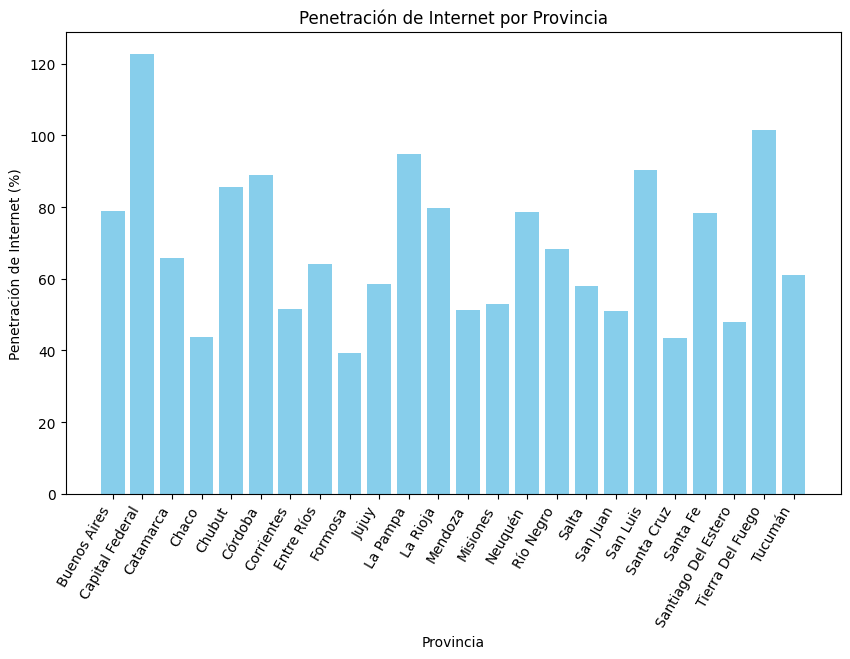

In [3]:
# Graficar el KPI
plt.figure(figsize=(10, 6))
plt.bar(df_kpi['Provincia'], df_kpi['Accesos por cada 100 hogares'], color='skyblue')
# Ajustar el ángulo del texto en el eje x
plt.xticks(rotation=60, ha='right') 
plt.title('Penetración de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Penetración de Internet (%)')
plt.show()

| No. | Nombre del KPI | Descripción | Fórmula | Columnas Utilizadas (DF) | Insights |
| --- | --- | --- | --- | --- | --- |
| 2 | Penetración Nacional de Internet | Porcentaje de hogares con acceso a Internet a nivel nacional |  = Accesos por cada 100 hogares a nivel nacional | DF 2: Internet\_Penetracion | Permite evaluar el alcance del servicio en todo el país y detectar brechas de cobertura.

In [4]:
# Lee el df (Read the DataFrame)
file = 'dataClean\\02-Internet_Penetracion.csv'
df = pd.read_csv(file)
# Selecciona columnas
columnas_deseadas = ['Año', 'Trimestre', 'Accesos por cada 100 hogares','Accesos por cada 100 hab']
df = df[columnas_deseadas]
# cambia las , por . y convierte a float
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)
df1 = df.copy()

# Encontrar el año con el mayor valor en la columna 'Accesos por cada 100 hogares'
año_maximo = df.loc[df['Accesos por cada 100 hogares'].idxmax(), 'Año']
print("Año con el mayor valor:", año_maximo)
# Crear un nuevo DataFrame que contenga solo las filas correspondientes al año máximo
df = df[df['Año'] == año_maximo].reset_index(drop=True)

trimestre = df['Trimestre'].max()
print("Trimestre con el mayor valor:", trimestre)
df_kpi = df[df['Trimestre'] == trimestre]
df_kpi = df_kpi[['Accesos por cada 100 hogares','Accesos por cada 100 hab']]

df_kpi.head(3)

# Display the header (first row) of the DataFrame
display(df_kpi.head())

Año con el mayor valor: 2022
Trimestre con el mayor valor: 4


,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,77.21,24.15


In [5]:
promedio_personas_hogar = 77.21/24.15
print("Promedio de personas por hogar: ",promedio_personas_hogar)

Promedio de personas por hogar:  3.197101449275362


In [6]:
df1['hab x casa'] = df1['Accesos por cada 100 hogares'] / df1['Accesos por cada 100 hab'] 
df1.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,hab x casa
0,2022,4,77.21,24.15,3.197101
1,2022,3,76.64,23.95,3.200000
2,2022,2,75.97,23.72,3.202782


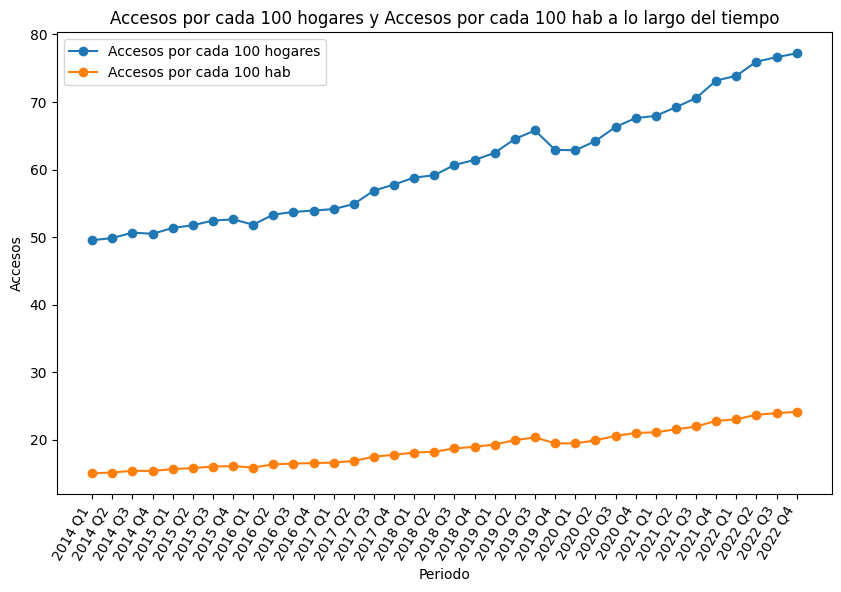

In [7]:
import matplotlib.pyplot as plt

#Creando los periodos
df1['Periodo'] = df1['Año'].astype(str) + ' Q' + df1['Trimestre'].astype(str)
# Ordenar el DataFrame por periodo
df1 = df1.sort_values('Periodo')

# Graficar las líneas
plt.figure(figsize=(10, 6))
plt.plot(df1['Periodo'], df1['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(df1['Periodo'], df1['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

# Etiquetas y título
plt.title('Accesos por cada 100 hogares y Accesos por cada 100 hab a lo largo del tiempo')
# Ajustar el ángulo del texto en el eje x
plt.xticks(rotation=60, ha='right')
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.legend()  # Agregar leyenda

# Mostrar la gráfica
plt.show()


| No. | Nombre del KPI | Descripción | Fórmula | Columnas Utilizadas (DF) | Insights |
| --- | --- | --- | --- | --- | --- |
| 3 | Distribución de Tecnologías | Proporción de conexiones de banda ancha fija sobre el total | (Número de conexiones de banda ancha fija / Total de conexiones) \* 100 | DF 3: Internet\_BAF | Proporciona información sobre las preferencias tecnológicas de los usuarios. |

In [2]:
import pandas as pd

# Lee el df (Read the DataFrame)
file = 'dataClean\\03-Internet_BAF.csv'
df = pd.read_csv(file)
df.head(0)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo


Creamos los periodos y seleccionamos las calumnas 

In [3]:
#Creando los periodos
df['Periodo'] = df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str)
# Ordenar el DataFrame por periodo
df = df.sort_values('Periodo')

# Selecciona columnas
columnas_deseadas = ['Periodo', 'Banda ancha fija','Dial up','Total']
df = df[columnas_deseadas]
df.head()


,Periodo,Banda ancha fija,Dial up,Total
35,2014 Q1,6,36,6
34,2014 Q2,6,36,6
33,2014 Q3,7,36,7
32,2014 Q4,7,39,7
31,2015 Q1,7,38,7


In [ ]:
# cambia las , por . y convierte a float
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

Por falta de tiempo ya no pude graficar todas las kpis, decidí hacer las transforaciones de las tablas(archivos) que usaria para hacer la presentación en Power BI. 